In [1]:
import random
import numpy as np

In [2]:
class KMeans:
    def __init__(self,n_clusters=2,max_iter=100):
        self.n_clusters=n_clusters
        self.max_iter=max_iter
        self.centroids=None
    
    def fit_predict(self,x):
        random_index=random.sample(range(0,x.shape[0]),self.n_clusters)
        self.centroids=x[random_index]

        for i in range(0,self.max_iter):
            cluster_group=self.assign_clusters(x)
            old_centroids=self.centroids

            self.centroids=self.move_centroids(x,cluster_group)
            if (old_centroids == self.centroids).all():
                break
        return cluster_group
    
    def assign_clusters(self,x):
        cluster_group=[]
        distances=[]

        for row in x:
            for centroid in self.centroids:
                distances.append(np.sqrt(np.dot(row-centroid,row-centroid)))
            min_distance=min(distances)
            index_pos=distances.index(min_distance)
            cluster_group.append(index_pos)
            distances.clear()
        return np.array(cluster_group)
    
    def move_centroids(self,x,cluster_group):
        new_centroids=[]
        cluster_type = np.unique(cluster_group)

        for type in cluster_type:
            new_centroids.append(x[cluster_group==type].mean(axis=0))
        return np.array(new_centroids)

In [3]:
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
import pandas as pd

In [4]:
df=pd.read_csv(r"F:\ML\100 days ml\practice\data\student_clustering.csv")

In [5]:
df.head()

,cgpa,iq
0,5.13,88
1,5.90,113
2,8.36,93
3,8.27,97
4,5.45,110


In [6]:
x=df.iloc[:,:].values

In [24]:
km=KMeans(n_clusters=4,max_iter=500)
y_mean=km.fit_predict(x)

In [25]:
y_mean

array([0, 2, 1, 3, 2, 2, 3, 2, 2, 1, 0, 2, 3, 0, 2, 3, 2, 1, 2, 2, 3, 0,
       1, 0, 0, 3, 0, 2, 1, 2, 2, 2, 2, 2, 3, 3, 2, 2, 0, 2, 0, 3, 1, 0,
       2, 2, 1, 2, 2, 2, 0, 0, 2, 3, 2, 2, 2, 2, 2, 2, 3, 3, 3, 2, 0, 2,
       1, 0, 2, 3, 2, 2, 1, 0, 2, 2, 2, 2, 0, 1, 1, 2, 2, 0, 2, 0, 2, 2,
       2, 2, 2, 2, 1, 0, 3, 1, 2, 3, 1, 2, 2, 0, 0, 2, 0, 0, 1, 0, 2, 2,
       1, 2, 2, 2, 1, 2, 3, 2, 2, 0, 0, 2, 1, 2, 3, 0, 3, 2, 0, 3, 1, 2,
       0, 0, 2, 2, 2, 0, 3, 3, 1, 0, 2, 0, 0, 2, 0, 2, 2, 0, 2, 0, 2, 2,
       0, 3, 2, 2, 2, 1, 0, 2, 2, 1, 2, 0, 2, 0, 0, 2, 2, 2, 2, 0, 0, 3,
       2, 2, 0, 2, 2, 2, 2, 2, 3, 0, 1, 1, 2, 2, 1, 1, 0, 0, 3, 0, 2, 2,
       2, 2])

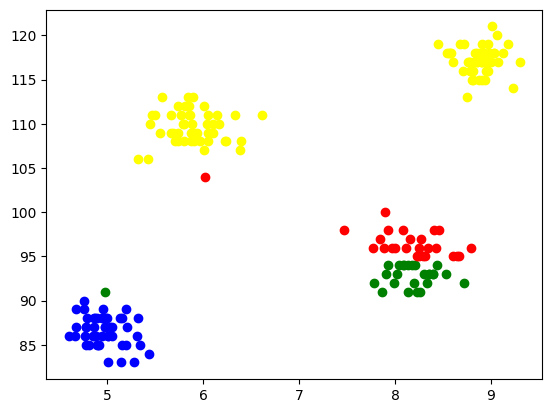

In [26]:
plt.scatter(x[y_mean==0,0],x[y_mean==0,1],color='blue')
plt.scatter(x[y_mean==1,0],x[y_mean==1,1],color='green')
plt.scatter(x[y_mean==2,0],x[y_mean==2,1],color='yellow')
plt.scatter(x[y_mean==3,0],x[y_mean==3,1],color='red')